In [96]:
# ex1

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [98]:
A = np.array([[0.3, 0.6, 0.1], [0.5, 0.2, 0.3], [0.4, 0.1, 0.5]])
v = np.array([1/3, 1/3, 1/3])

In [99]:
dists = np.zeros(25)
for i in range(25):
    v_prim = v.dot(A)
    dist = np.linalg.norm(v_prim - v)
#     print(v_prim)
#     print(v)
    dists[i] = dist
    v = v_prim

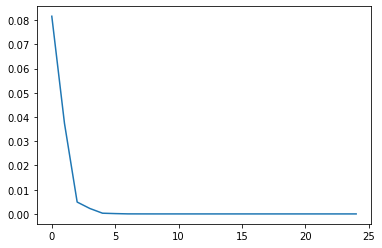

In [100]:
plt.plot(dists);

In [101]:
# ex2

In [102]:
def random_Y(n=1000):
    Y = np.random.random(n).sum()
    return Y

n = 10000
Y_s = np.zeros(n)
for i in range(n):
    Y_s[i] = random_Y(10000)

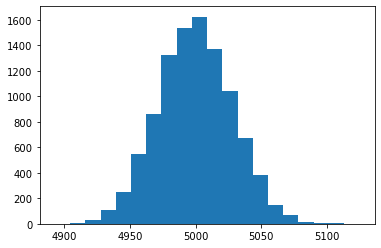

In [103]:
# plt.plot(Y_s)
plt.hist(Y_s, bins=20);

In [104]:
print(Y_s.mean())
print(Y_s.var())

4999.600713410942
800.0580676885509


In [105]:
# ex3

In [106]:
import pandas as pd

In [107]:
mnist_train = pd.read_csv("./mnist_train.csv")

In [108]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
labels = []
for i in range(10):
    labels.append(mnist_train[mnist_train['label']==i])

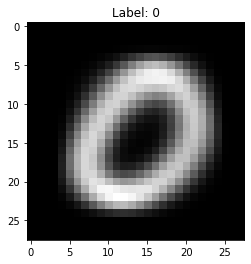

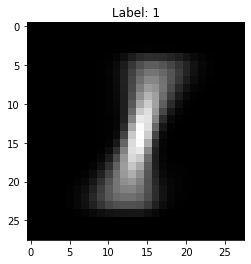

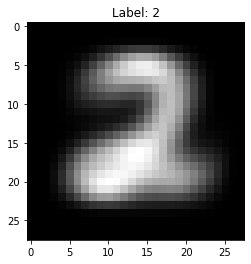

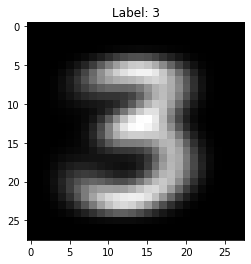

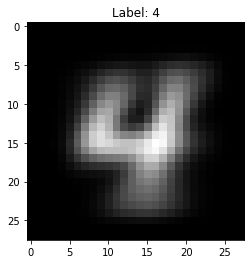

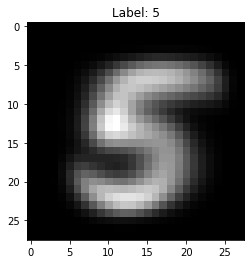

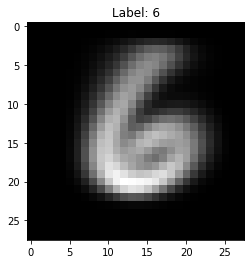

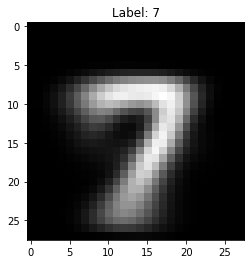

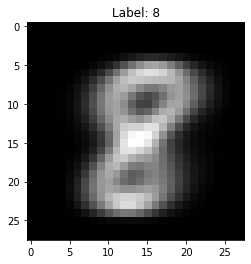

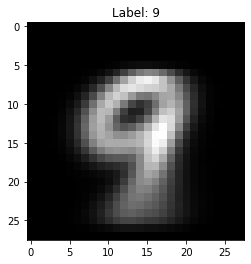

In [110]:
for label in range(len(labels)):
    im = np.array(labels[label].mean()[1:]).reshape(28, 28)
    plt.imshow(im, cmap='gray')
    plt.title("Label: %s" % label)
    plt.show()

In [111]:
# ex4

In [112]:
# np.array(labels[0].mean()[1:]).reshape(28, 28)

In [113]:
def rotate_pic(input_pic,mode=0):
    if mode == 0:
        output_pic = np.zeros(input_pic.shape)
        for i in range(input_pic.shape[0]):
            output_pic[:,i]=input_pic[input_pic.shape[0]-i-1,:]
        return output_pic
    elif mode == 1:
        return np.rot90(input_pic,3)


In [114]:
# for label in range(len(labels)):
#     im = np.array(labels[label].mean()[1:]).reshape(28, 28)
#     plt.imshow(rotate_pic(im,mode=1), cmap='gray')
#     plt.title("Label: %s" % label)
#     plt.show()

In [115]:
# for label in range(len(labels)):
#     im = np.array(labels[label].mean()[1:]).reshape(28, 28)
#     plt.imshow(rotate_pic(im,mode=0), cmap='gray')
#     plt.title("Label: %s" % label)
#     plt.show()

In [116]:
# ex5

In [117]:
def is_symmetric(matrix,mode=0):
    if mode == 0:
        return np.all(matrix == matrix.T)
    elif mode == 1:   
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if matrix[i,j]!=matrix[j,i]:
                    return False
        return True


def check(A,b):
    print("Testing:", A)
    assert(is_symmetric(A,0) == b)
    assert(is_symmetric(A,1) == b)

In [118]:
A = np.zeros((3, 3))
check(A, True)

A = np.eye(3)
check(A, True)

A = np.random.randn(3, 2)
A = A.dot(A.T)
check(A, True)

A = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
check(A, True)

A = np.random.randn(3, 3)
check(A, False)

A = np.arange(9).reshape(3, 3)
check(A, False)

# A = np.random.randn(3, 2)
# check(A, False)

Testing: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Testing: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Testing: [[ 0.70749279  0.68577295 -0.35580366]
 [ 0.68577295  1.32396741 -0.80707427]
 [-0.35580366 -0.80707427  0.50297711]]
Testing: [[1 2 3]
 [2 4 5]
 [3 5 6]]
Testing: [[-0.09994405 -1.09229938 -0.56543704]
 [-0.34483445  2.12248017 -0.52145242]
 [ 1.99269567 -0.84506661 -0.27028631]]
Testing: [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [119]:
# ex6

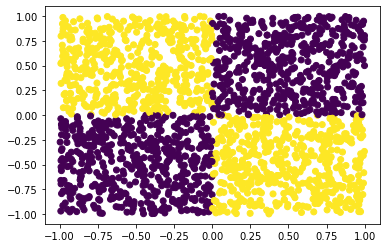

In [120]:
n = 2000
X = 2*np.random.random((n,2)) -1
Y = np.zeros(n)

Y[(X[:,0] < 0) & (X[:,1] > 0)] = 1
Y[(X[:,0] > 0) & (X[:,1] < 0)] = 1

# for i in range(len(X)):
#     if (X[i,0] < 0 and X[i,1] > 0 ) or (X[i,0] > 0 and X[i,1] < 0 ):
#         Y[i] = 1

plt.scatter(X[:,0],X[:,1],c=Y);

In [121]:
# ex7

In [122]:
def get_donut(R_inner, R_outer, N):

  # distance from origin is radius + random normal
  # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

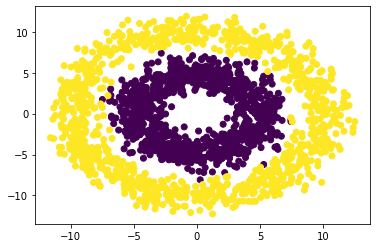

In [123]:
X, Y = get_donut(5,10,2000)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [239]:
# ex8 VIP

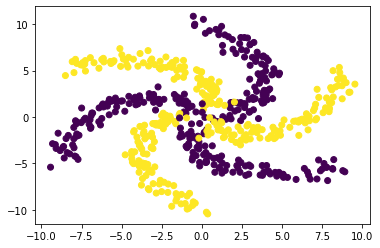

In [236]:
def get_spiral():
    # Idea: radius -> low...high
    #           (don't start at 0, otherwise points will be "mushed" at origin)
    #       angle = low...high proportional to radius
    #               [0, 2pi/6, 4pi/6, ..., 10pi/6] --> [pi/2, pi/3 + pi/2, ..., ]
    # x = rcos(theta), y = rsin(theta) as usual

    radius = np.linspace(1, 10, 100)
    thetas = np.zeros((6, 100))
    for i in range(6):
        start_angle = np.pi*i / 3.0
        end_angle = start_angle + np.pi / 2
        points = np.linspace(start_angle, end_angle, 100)
        thetas[i] = points

    # convert into cartesian coordinates
    x1 = np.empty((6, 100))
    x2 = np.empty((6, 100))
    for i in range(6):
        x1[i] = radius * np.cos(thetas[i])
        x2[i] = radius * np.sin(thetas[i])

    # inputs
    X = np.zeros((600, 2))
    X[:,0] = x1.flatten()
    X[:,1] = x2.flatten()

    # add noise
    X += np.random.randn(600, 2)*0.5

    # targets
    Y = np.array([0]*100 + [1]*100 + [0]*100 + [1]*100 + [0]*100 + [1]*100)
    return X, Y


X, Y = get_spiral()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [125]:
# ex9

In [189]:
X, Y = get_donut(5,10,2000)
data = np.concatenate((X, np.expand_dims(Y, 1)), axis=1)
df = pd.DataFrame(data)
df.columns = ['x1','x2','y']

In [186]:
df

,x1,x2,y
0,5.792662,-0.985636,0.0
1,-3.473825,2.744332,0.0
2,-4.418691,-1.099668,0.0
3,0.032694,5.065161,0.0
4,3.256420,-0.407885,0.0
...,...,...,...
1995,4.582356,9.207395,1.0
1996,-0.053988,-8.726695,1.0
1997,8.004281,-1.174584,1.0
1998,-1.147999,10.151175,1.0


In [190]:
df.to_csv('./donut_ex9.csv', index=False)

In [191]:
pd.read_csv("./donut_ex9.csv").head()

,x1,x2,y
0,-0.354129,4.276188,0.0
1,1.410233,4.570928,0.0
2,4.434205,3.852325,0.0
3,3.111976,4.166433,0.0
4,-3.245464,1.432740,0.0
